In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv',header=None,
                names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
                "Viscera weight", "Shell weight", "Age"])
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [3]:
data.shape

(3320, 8)

In [4]:
abalone_features=data.copy()
abalone_labels=abalone_features.pop('Age')

In [5]:
abalone_features=np.array(abalone_features)
abalone_features

array([[0.435 , 0.335 , 0.11  , ..., 0.1355, 0.0775, 0.0965],
       [0.585 , 0.45  , 0.125 , ..., 0.3545, 0.2075, 0.225 ],
       [0.655 , 0.51  , 0.16  , ..., 0.396 , 0.2825, 0.37  ],
       ...,
       [0.53  , 0.42  , 0.13  , ..., 0.3745, 0.167 , 0.249 ],
       [0.395 , 0.315 , 0.105 , ..., 0.1185, 0.091 , 0.1195],
       [0.45  , 0.355 , 0.12  , ..., 0.1145, 0.0665, 0.16  ]])

In [6]:
#Example
input=tf.keras.Input(shape=(),dtype=tf.float32)
result=2*input+1

model=tf.keras.Model(inputs=input,outputs=result)
print(model(1).numpy())
print(model(2).numpy())

3.0
5.0


In [7]:
model=tf.keras.Sequential([
      tf.keras.layers.Dense(64),
      tf.keras.layers.Dense(1)])

model.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError())

In [8]:
model.fit(abalone_features,abalone_labels,epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 858us/step - loss: 58.7592
Epoch 2/10
104/104 [==============================] - 0s 827us/step - loss: 11.3977
Epoch 3/10
104/104 [==============================] - 0s 829us/step - loss: 8.5504
Epoch 4/10
104/104 [==============================] - 0s 835us/step - loss: 8.0430
Epoch 5/10
104/104 [==============================] - 0s 840us/step - loss: 7.5948
Epoch 6/10
104/104 [==============================] - 0s 849us/step - loss: 7.2321
Epoch 7/10
104/104 [==============================] - 0s 1ms/step - loss: 6.9423
Epoch 8/10
104/104 [==============================] - 0s 881us/step - loss: 6.7341
Epoch 9/10
104/104 [==============================] - 0s 1ms/step - loss: 6.5932
Epoch 10/10
104/104 [==============================] - 0s 902us/step - loss: 6.4893


In [9]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000
mean,0.522693,0.406575,0.139271,0.824734,0.357705,0.180162,0.237921,9.896988
std,0.121164,0.100120,0.042708,0.491182,0.222223,0.110182,0.140261,3.205654
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.345000,0.115000,0.436375,0.181500,0.092000,0.127375,8.000000
50%,0.540000,0.425000,0.140000,0.795250,0.335500,0.170750,0.230000,9.000000
75%,0.615000,0.480000,0.165000,1.150000,0.504500,0.253125,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,27.000000


Basic preprocessing

In [10]:
normalize=tf.keras.layers.experimental.preprocessing.Normalization()

In [11]:
#Not yet normalized just adapt
normalize.adapt(abalone_features)

In [12]:
normalize(abalone_features[:2])

<tf.Tensor: shape=(2, 7), dtype=float32, numpy=
array([[-0.7238635 , -0.7150031 , -0.68547636, -0.9992395 , -1.0000671 ,
        -0.93188924, -1.0084196 ],
       [ 0.514317  ,  0.43379208, -0.33420318,  0.10031501, -0.01442314,
         0.24815692, -0.09213238]], dtype=float32)>

In [13]:
norm_model=tf.keras.Sequential([
           normalize,
           tf.keras.layers.Dense(60),
           tf.keras.layers.Dense(64),
           tf.keras.layers.Dense(1)])
 
norm_model.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError())

In [14]:
norm_model.fit(abalone_features,abalone_labels,epochs=10)

Epoch 1/10
104/104 [==============================] - 0s 955us/step - loss: 66.9069
Epoch 2/10
104/104 [==============================] - 0s 1ms/step - loss: 5.5240
Epoch 3/10
104/104 [==============================] - 0s 1ms/step - loss: 5.1158
Epoch 4/10
104/104 [==============================] - 0s 1ms/step - loss: 5.1552
Epoch 5/10
104/104 [==============================] - 0s 954us/step - loss: 5.0668
Epoch 6/10
104/104 [==============================] - 0s 918us/step - loss: 4.9880
Epoch 7/10
104/104 [==============================] - 0s 931us/step - loss: 4.9265
Epoch 8/10
104/104 [==============================] - 0s 1ms/step - loss: 5.0394
Epoch 9/10
104/104 [==============================] - 0s 927us/step - loss: 4.9974
Epoch 10/10
104/104 [==============================] - 0s 1ms/step - loss: 5.0066


Mixed data types(New data)



In [15]:
titantic=pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
titantic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [16]:
titantic_features=titantic.copy()
titantic_labels=titantic_features.pop('survived')

In [17]:
inputs={}
for name,column in titantic_features.items():
  dtype=column.dtype
  if dtype==object:
    dtype=tf.string
  else:
    dtype=tf.float32
 
  inputs[name]=tf.keras.Input(shape=(1,),name=name,dtype=dtype)

inputs

{'age': <tf.Tensor 'age:0' shape=(None, 1) dtype=float32>,
 'alone': <tf.Tensor 'alone:0' shape=(None, 1) dtype=string>,
 'class': <tf.Tensor 'class:0' shape=(None, 1) dtype=string>,
 'deck': <tf.Tensor 'deck:0' shape=(None, 1) dtype=string>,
 'embark_town': <tf.Tensor 'embark_town:0' shape=(None, 1) dtype=string>,
 'fare': <tf.Tensor 'fare:0' shape=(None, 1) dtype=float32>,
 'n_siblings_spouses': <tf.Tensor 'n_siblings_spouses:0' shape=(None, 1) dtype=float32>,
 'parch': <tf.Tensor 'parch:0' shape=(None, 1) dtype=float32>,
 'sex': <tf.Tensor 'sex:0' shape=(None, 1) dtype=string>}

In [18]:
#Dictionary
numeric_inputs={name:input for name,input in inputs.items()
                if input.dtype==tf.float32}
numeric_inputs               

{'age': <tf.Tensor 'age:0' shape=(None, 1) dtype=float32>,
 'fare': <tf.Tensor 'fare:0' shape=(None, 1) dtype=float32>,
 'n_siblings_spouses': <tf.Tensor 'n_siblings_spouses:0' shape=(None, 1) dtype=float32>,
 'parch': <tf.Tensor 'parch:0' shape=(None, 1) dtype=float32>}

In [19]:
#Expects an input of shape (None,4)
x=tf.keras.layers.Concatenate()(list(numeric_inputs.values()))
norm=tf.keras.layers.experimental.preprocessing.Normalization()
norm.adapt(np.array(titantic[numeric_inputs.keys()]))
all_numeric_inputs=norm(x)
all_numeric_inputs

<tf.Tensor 'normalization_1/truediv:0' shape=(None, 4) dtype=float32>

In [20]:
#Collect all the symbolic preprocessing results, to concatenate them later.
preprocessed_inputs=[all_numeric_inputs]
preprocessed_inputs

[<tf.Tensor 'normalization_1/truediv:0' shape=(None, 4) dtype=float32>]

In [21]:
for name,input in inputs.items():
  if input.dtype==tf.float32:
    continue

  lookup=tf.keras.layers.experimental.preprocessing.StringLookup(vocabulary=np.unique(titantic_features[name])) 
  one_hot=tf.keras.layers.experimental.preprocessing.CategoryEncoding(lookup.vocab_size())
  x=lookup(input)
  x=one_hot(x)
  preprocessed_inputs.append(x)

In [22]:
preprocessed_inputs

[<tf.Tensor 'normalization_1/truediv:0' shape=(None, 4) dtype=float32>,
 <tf.Tensor 'category_encoding/bincount/DenseBincount:0' shape=(None, 4) dtype=float32>,
 <tf.Tensor 'category_encoding_1/bincount/DenseBincount:0' shape=(None, 5) dtype=float32>,
 <tf.Tensor 'category_encoding_2/bincount/DenseBincount:0' shape=(None, 10) dtype=float32>,
 <tf.Tensor 'category_encoding_3/bincount/DenseBincount:0' shape=(None, 6) dtype=float32>,
 <tf.Tensor 'category_encoding_4/bincount/DenseBincount:0' shape=(None, 4) dtype=float32>]

In [23]:
preprocessed_inputs_cat=tf.keras.layers.Concatenate()(preprocessed_inputs)
preprocessed_inputs_cat

<tf.Tensor 'concatenate_1/concat:0' shape=(None, 33) dtype=float32>

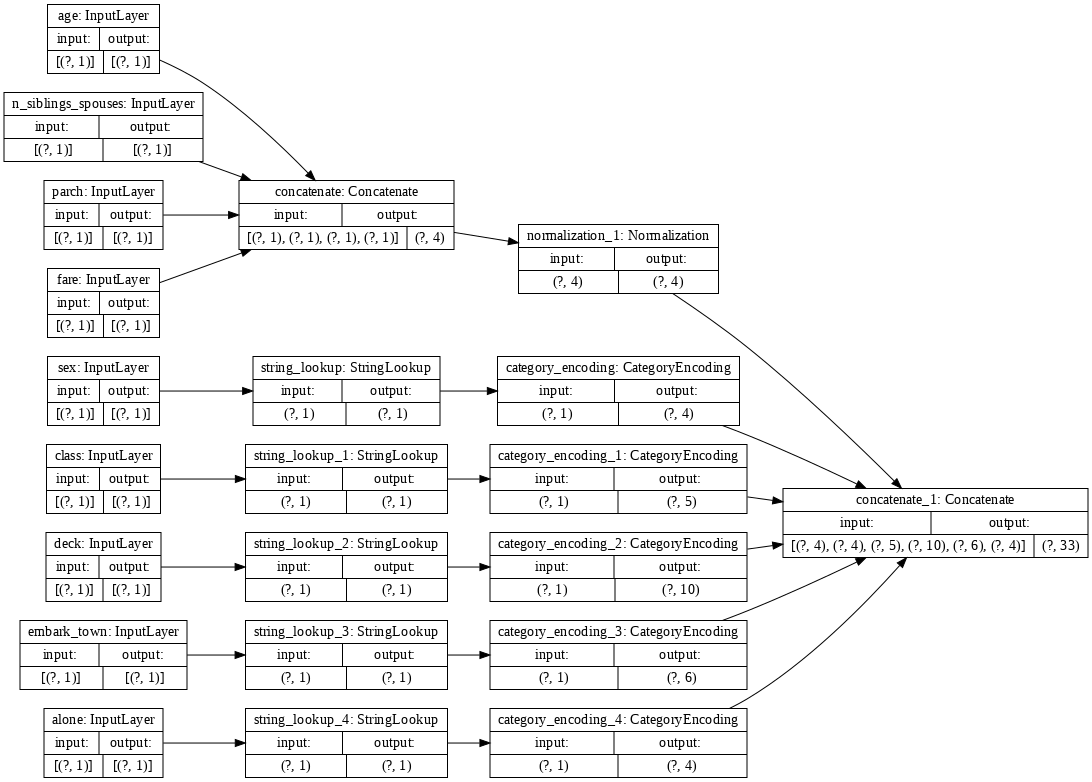

In [24]:
titantic_preprocessing=tf.keras.Model(inputs,preprocessed_inputs_cat)
tf.keras.utils.plot_model(model=titantic_preprocessing,rankdir='LR',dpi=72,show_shapes=True)

In [28]:
titantic_features_dict={name:np.array(value) for 
                        name,value in titantic_features.items()}

In [34]:
#Slice out the first training example and pass it to this preprocessing model, 
#you see the numeric features and string one-hots all concatenated together
features_dict={name:values[:1] for name,values in titantic_features_dict.items()}
features_dict

{'age': array([22.]),
 'alone': array(['n'], dtype=object),
 'class': array(['Third'], dtype=object),
 'deck': array(['unknown'], dtype=object),
 'embark_town': array(['Southampton'], dtype=object),
 'fare': array([7.25]),
 'n_siblings_spouses': array([1]),
 'parch': array([0]),
 'sex': array(['male'], dtype=object)}

In [35]:
titantic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 33), dtype=float32, numpy=
array([[-0.6104149 ,  0.39519805, -0.4790527 , -0.4974028 ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ]], dtype=float32)>

In [44]:
#Build the model
def titantic_model(preprocessing_head,inputs):
  body=tf.keras.Sequential([
       tf.keras.layers.Dense(64),
       tf.keras.layers.Dense(1)])
  
  preprocessed_inputs=preprocessing_head(inputs)
  result=body(preprocessed_inputs)
  model=tf.keras.Model(inputs,result)

  model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['acc'])
  return model

titantic_model=titantic_model(titantic_preprocessing,inputs)

In [45]:
titantic_model.summary()

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
age (InputLayer)                [(None, 1)]          0                                            
__________________________________________________________________________________________________
alone (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
class (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
deck (InputLayer)               [(None, 1)]          0                                            
______________________________________________________________________________________

In [46]:
titantic_model.fit(x=titantic_features_dict,y=titantic_labels,epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 1ms/step - loss: 0.6468 - acc: 0.6459
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 0.5385 - acc: 0.6922
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4933 - acc: 0.7448
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4651 - acc: 0.7687
Epoch 5/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4487 - acc: 0.7863
Epoch 6/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4387 - acc: 0.7895
Epoch 7/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4317 - acc: 0.8054
Epoch 8/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4260 - acc: 0.8086
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4243 - acc: 0.8150
Epoch 10/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4222 - acc: 0.8118


In [ ]:
titantic_model.save('test')
reloaded=tf.keras.models.load_model('test')

In [50]:
features_dict={name:values[:1] for name,values in titantic_features_dict.items()}

before=titantic_model(features_dict)
after=reloaded(features_dict)
print(before)
print(after)

tf.Tensor([[-1.8167281]], shape=(1, 1), dtype=float32)
tf.Tensor([[-1.8167281]], shape=(1, 1), dtype=float32)


In [61]:
loss,accuracy=titantic_model.evaluate(features_dict,y=tf.constant([0.]))

1/1 [==============================] - 0s 1ms/step - loss: 0.1506 - acc: 1.0000


Using tf.data

In [64]:
features_ds=tf.data.Dataset.from_tensor_slices(titantic_features_dict)

In [65]:
features_ds

<TensorSliceDataset shapes: {sex: (), age: (), n_siblings_spouses: (), parch: (), fare: (), class: (), deck: (), embark_town: (), alone: ()}, types: {sex: tf.string, age: tf.float64, n_siblings_spouses: tf.int64, parch: tf.int64, fare: tf.float64, class: tf.string, deck: tf.string, embark_town: tf.string, alone: tf.string}>

In [66]:
next(iter(features_ds))

{'age': <tf.Tensor: shape=(), dtype=float64, numpy=22.0>,
 'alone': <tf.Tensor: shape=(), dtype=string, numpy=b'n'>,
 'class': <tf.Tensor: shape=(), dtype=string, numpy=b'Third'>,
 'deck': <tf.Tensor: shape=(), dtype=string, numpy=b'unknown'>,
 'embark_town': <tf.Tensor: shape=(), dtype=string, numpy=b'Southampton'>,
 'fare': <tf.Tensor: shape=(), dtype=float64, numpy=7.25>,
 'n_siblings_spouses': <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 'parch': <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 'sex': <tf.Tensor: shape=(), dtype=string, numpy=b'male'>}

In [71]:
for example in features_ds:
  for name,value in example.items():
    print(f"{name}:{value}")
  break  

sex:b'male'
age:22.0
n_siblings_spouses:1
parch:0
fare:7.25
class:b'Third'
deck:b'unknown'
embark_town:b'Southampton'
alone:b'n'


In [75]:
titantic_features_dict.keys()

dict_keys(['sex', 'age', 'n_siblings_spouses', 'parch', 'fare', 'class', 'deck', 'embark_town', 'alone'])

In [79]:
titantic_ds=tf.data.Dataset.from_tensor_slices((titantic_features_dict,titantic_labels))
titantic_ds=titantic_ds.shuffle(len(titantic_labels)).batch(32)

In [81]:
next(iter(titantic_ds))

({'age': <tf.Tensor: shape=(32,), dtype=float64, numpy=
  array([ 2., 14., 20., 28., 19., 30., 31., 39., 28., 32., 50., 30.,  6.,
         19., 23., 35., 24., 28., 42., 40., 54., 28., 21., 50., 30., 30.,
         27., 30., 37., 51., 18., 28.])>,
  'alone': <tf.Tensor: shape=(32,), dtype=string, numpy=
  array([b'n', b'n', b'y', b'y', b'y', b'n', b'n', b'n', b'y', b'y', b'n',
         b'y', b'n', b'n', b'y', b'y', b'n', b'y', b'n', b'n', b'n', b'y',
         b'y', b'n', b'y', b'y', b'n', b'y', b'n', b'n', b'n', b'y'],
        dtype=object)>,
  'class': <tf.Tensor: shape=(32,), dtype=string, numpy=
  array([b'Third', b'Third', b'Third', b'Third', b'Third', b'Third',
         b'First', b'First', b'First', b'Third', b'First', b'First',
         b'Third', b'First', b'Second', b'First', b'Second', b'Third',
         b'Second', b'Third', b'First', b'Second', b'Third', b'First',
         b'Third', b'First', b'Second', b'Third', b'Second', b'First',
         b'Second', b'Third'], dtype=object)>

In [83]:
titantic_model.fit(titantic_ds,epochs=5)

Epoch 1/5
20/20 [==============================] - 0s 3ms/step - loss: 0.4187 - acc: 0.8309
Epoch 2/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4190 - acc: 0.8278
Epoch 3/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4196 - acc: 0.8278
Epoch 4/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4180 - acc: 0.8278
Epoch 5/5
20/20 [==============================] - 0s 2ms/step - loss: 0.4193 - acc: 0.8293
